<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 8: The Secant method and Systems of linear equations

In this Notebook, we start with a small review by implementing the Secant method for finding the zero of a function. After that, we learn how to build and solve systems of linear equations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## In de titel staat notebook 8 ipv notebook  7

### Exercise 1
Write a Python function for $f(x)=x^3+6x^2+11x-6$. Call the function `fbouw`. Plot $f(x)$ for $x$ varying from -10 to 10. Notice that $f(x)$ has a zero somewhere on the plotted interval. Plot a horizontal dashed line at $y=0$ using the `plt.axhline` function. 

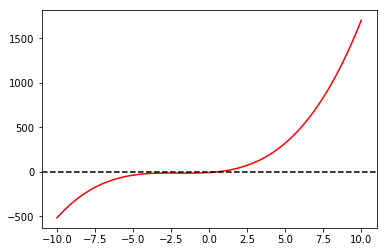

In [2]:
def fbouw(x):
    y = x ** 3 + 6 * x ** 2 + 11 * x - 6
    return y

x = np.linspace(-10,10,100)
plt.plot(x,fbouw(x),'r')
plt.axhline(0, linestyle='dashed', color='black');

### Exercise 2,  Secant method

You are asked to implement the Secant method to determine the (approximate) zero of an arbitrary function $f(x)$, so you are trying to find the value of $x$ for which $f(x)=0$. More information on the Secant method can be found [here](https://en.wikipedia.org/wiki/Secant_method). The Secant method is a very old method and works as follows. You start with two $x$ values, let's call them $x_0$ and $x_1$, and compute $f(x_0)$ and $f(x_1)$. Next, you draw a straight line between $f(x_0)$ and $f(x_1)$ and find the $x$ value where this straight line intersects the $y$-axis. This value is called $x_2$ (see the figure below) and is your next best estimate of the zero of the function. Next, you repeat this process, but now with $x_1$ and $x_2$. You compute $f(x_1)$ and $f(x_2)$, draw a straight line through these two function values and call the intersection of the straight line with the $y$-axis $x_3$. 

<img src="351px-Secant_method.PNG">

In summary, the Secant method works as follows:
1. Choose two values $x_0$ and $x_1$ (the closer these values are to the root (the zero of the function), the better the Secant method works, of course). 
2. Compute $x_n$ (starting with $n=2$), which is the intersection of the straight line with the $y$-axis:
$x_n =x_{n-1}-f(x_{n-1} ) \frac{x_{n-1}-x_{n-2}} {f(x_{n-1})-f(x_{n-2})}$
3. Compute $f(x_n)$
4. Check if $f(x_n)$ lies within a specified tolerance. If so, you have found the approximate $x$ root of $f$. 
5. If not, return to step 2 with the next value of $n$

Implement the Secant method in a function called `secant`. Your `secant` function should take the following input arguments:
* The function for which you want to find the root.
* Starting values $x_0$ and $x_1$ . 
* The maximum number of iterations `nmax`. Make `nmax` a keyword argument with a default value of 10. 
* The tolerance `tol` used as a stopping criterion. Make `tol` a keyword argument with a default value of 0.001.

Your function should return the value of $x$ where $f(x)$ equals (approximately) zero. Your function should print a warning to the screen when the maximum number of iterations is reached before the tolerance is met.

In writing your code it is advisable to print the value of $x_n$ and $f(x_n)$ to the screen every iteration, so you can see how your `secant` function performs (or whether you have any bugs left). Turn this printing off when your function works correctly.

Use your `secant` method to find the zero of the function $f(x)$ you programmed in Step 1 and make sure it is within `tol=0.001` of the exact value.

Run the following three lines of code to demonstrate that your function works correctly (the third call to the `secant` method should not converge before the tolerance is met).

    solution = secant(fbouw, 0, 1.)
    print('The solution is', solution, 'and the function value is', fbouw(solution))

    solution = secant(fbouw, 0, 1., tol=1e-6)
    print('The solution is', solution, 'and the function value is', fbouw(solution))

    solution = secant(fbouw, 0, 1., nmax=4, tol=1e-6)
    print('The solution is', solution, 'and the function value is', fbouw(solution))

In [3]:
def secant(f, x0, x1, nmax=10, tol = 0.001, ):
    x = np.zeros(nmax+2)
    x[0] = x0
    x[1] = x1
    z = 1
    for i in range(2, nmax+2):
        x[i] = x[i-1] - f(x[i-1])*(x[i-1]-x[i-2])/(f(x[i-1])-f(x[i-2]))
        z += 1
        if np.abs(f(x[i])) < tol:
            break 
    if z == (nmax + 1):
        print('the maximum number of itarations is reached')
    
    return(x[z])

solution = secant(fbouw, 0, 1.)
print('The solution is', solution, 'and the function value is', fbouw(solution))

solution = secant(fbouw, 0, 1., tol=1e-6)
print('The solution is', solution, 'and the function value is', fbouw(solution))

solution = secant(fbouw, 0, 1., nmax=4, tol=1e-6)
print('The solution is', solution, 'and the function value is', fbouw(solution))

The solution is 0.434831828092 and the function value is -0.000160133746954
The solution is 0.434841364069 and the function value is -6.96301958314e-08
the maximum number of itarations is reached
The solution is 0.434831828092 and the function value is -0.000160133746954


### Building and solving a system of linear equations
A parabola is defined by three points (provided they are not on a straight line). 
The equation for a parabola is $y=ax^2+bx+c$, where $a$, $b$, and $c$ are constants.
Given three points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$, the following system of three linear equations may be compiled

$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$

Or in matrix form

$
\left(
\begin{array}{ccc}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
a \\b \\c \\
\end{array}
\right)
=
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\end{array}
\right)
$

To solve this problem, we build a two-dimensional array containing the matrix (called `A`) and a one-dimensional array containing the right-hand side (called `rhs`).
Let's do that for the three points $(x_1,y_1)=(-2,2)$, $(x_2,y_2)=(1,-1)$, $(x_3,y_3)=(4,4)$

In [4]:
xp = np.array([-2, 1, 4])
yp = np.array([2, -1, 4])
A = np.zeros((3, 3))
rhs = np.zeros(3)
for i in range(3):
    A[i] = xp[i] ** 2, xp[i], 1  # Store one row at a time
    rhs[i] = yp[i]
print('Array A:')
print(A)
print('rhs:',rhs)

Array A:
[[  4.  -2.   1.]
 [  1.   1.   1.]
 [ 16.   4.   1.]]
rhs: [ 2. -1.  4.]


The system may be solved with the `solve` method, which is part of the `linalg` subpackage of `numpy`. The `solve` method takes as input a two-dimensional array (the matrix) and a one-dimensional array (the right-hand side) and returns the solution. To check whether the solution is correct, we need to do a matrix multiply of the matrix stored in the array `A` and the obtained solution, which we call `sol`. As we learned the line

`A * sol`

does a term-by-term multiply. For a matrix multiply, the `@` symbol needs to be used (alternatively, the `np.dot` function can be used; the `@` symbol does not work in Python 2).

In [5]:
sol = np.linalg.solve(A, rhs)
print('solution is:', sol)
print('specified values of y:', yp)
print('A @ sol:', A @ sol)

solution is: [ 0.44444444 -0.55555556 -0.88888889]
specified values of y: [ 2 -1  4]
A @ sol: [ 2. -1.  4.]


We can also visually check whether we solved the problem correctly by drawing the three points and the parabola. 

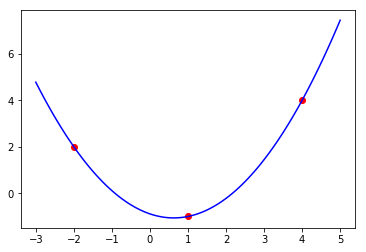

In [6]:
plt.plot(xp, yp, 'ro')
x = np.linspace(-3, 5, 100)
y = sol[0] * x ** 2 + sol[1] * x + sol[2]
plt.plot(x, y, 'b');

### Exercise 3. Fitting a wave
Consider the following four measurements of the quantity $y$ at time $t$: $(t_0,y_0)=(0,3)$, $(t_1,y_1)=(0.25,1)$, $(t_2,y_2)=(0.5,-3)$, $(t_3,y_3)=(0.75,1)$. The measurements are part of a wave that may be written as

$y = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

where $a$, $b$, $c$, and $d$ are parameters. Build a system of four linear equations and solve for the four parameters. Print the values of the four parameters to the screen. In addition, print the matrix times the solution to the screen to demonstrate that you solved the system correctly.

In [7]:
tp = np.array([0, 0.25, 0.5, 0.75])
yp = np.array([3, 1, -3, 1])
B = np.zeros((4, 4))
rhs2 = np.zeros(4)
for i in range(4):
    B[i] = np.cos(np.pi*tp[i]), np.cos(2*np.pi*tp[i]), np.cos(3*np.pi*tp[i]), np.cos(4*np.pi*tp[i])
    rhs2[i] = yp[i]
sol2 = np.linalg.solve(B, rhs2)
a = sol2[0]
b = sol2[1]
c = sol2[2]
d = sol2[3]

print('the value of a =', a)
print('the value of b =', b)
print('the value of c =', c)
print('the value of d =', d)
print('The matrix B times the cooficients a,b,c & d is:', B @ sol2)

the value of a = 1.0
the value of b = 2.0
the value of c = 1.0
the value of d = -1.0
The matrix B times the cooficients a,b,c & d is: [ 3.  1. -3.  1.]


### Exercise 4
For the problem of Exercise 3, plot the wave for $t$ going from 0 to 1 and show the four measurements with dots. Add a legend.

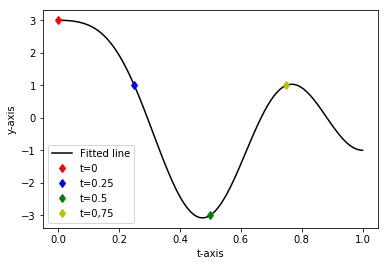

In [8]:
def func1(x):
    y = a * np.cos(1*np.pi*x) + b * np.cos(2*np.pi*x) + c * np.cos(3*np.pi*x) + d * np.cos(4*np.pi*x)
    return y 
x = np.linspace(0, 1, 100)
z = func1(x)


plt.plot(x,z,'k', tp[0],yp[0], 'rd', tp[1],yp[1], 'bd', tp[2],yp[2], 'gd', tp[3],yp[3], 'yd',)
plt.legend(['Fitted line', 't=0', 't=0.25', 't=0.5', 't=0,75'], loc='best')
plt.xlabel('t-axis')
plt.ylabel('y-axis');

### More equations than unknowns

What now if you have more equations than unkonwns? For example, what if you have 6 points in time where you have measured the quantity $y$, but you still want to fit a wave with four periods (and four parameters). In general, there is no solution to a system of 6 equations with 4 unknowns, unless you are very lucky. A common approach is to try to find the four parameters that fit the 6 equations as good as possible. One way to do this is to find the four parameters such that the sum of the squares of the errors between the specified right-hand-side and the computed right-hand-side is as small as possible. It is very easy to do this with `numpy`. You can simply specify a matrix with $M$ rows and $N$ colums, where $M>N$. And specify a right-hand-side with $M$ values. Then you can use the `np.linalg.lstsq` function to compute a solution. Note that the `np.linalg.lstsq` solution returns four things, of which the first one is the least squares solution (use `np.linalg.lstsq?` to find out what else is returned).

### Exercise 5. More equations than unknowns
Redo exercises 3 and 4, but now the value of $y$ is given at six values of $t$: $(t_0,y_0)=(0,3)$, $(t_1,y_1)=(0.25,1)$, $(t_2,y_2)=(0.5,-3)$, $(t_3,y_3)=(0.75,1)$, $(t_4,y_4)=(0.4,-1)$, $(t_5,y_5)=(0.6,-2)$. Compute the four parameters $a, b, c, d$ using the least squares approach. Plot the wave for $t$ going from 0 to 1 and show the six measurements with dots. Add a legend.

the value of a = 1.15828478862
the value of b = 1.90621349063
the value of c = 0.524778622951
the value of d = -0.872589472321
The matrix B times the cooficients a,b,c & d is: [ 2.71668743  1.32054598 -2.77880296  0.42463297 -1.87842923 -1.74517894]


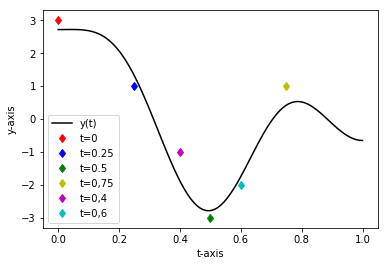

In [9]:
tp3 = np.array([0, 0.25, 0.5, 0.75, 0.4, 0.6])
yp3 = np.array([3, 1, -3, 1, -1, -2])
C = np.zeros((6, 4))
rhs3 = np.zeros(6)
for i in range(6):
    C[i] = np.cos(np.pi*tp3[i]), np.cos(2*np.pi*tp3[i]), np.cos(3*np.pi*tp3[i]), np.cos(4*np.pi*tp3[i])
    rhs3[i] = yp3[i]
sol3 = np.linalg.lstsq(C, rhs3)
sol4 = sol3[0]

print('the value of a =', sol4[0])
print('the value of b =', sol4[1])
print('the value of c =', sol4[2])
print('the value of d =', sol4[3])
print('The matrix B times the cooficients a,b,c & d is:', C @ sol4)

x = np.linspace(0, 1, 100)
y = sol4[0] * np.cos(1*np.pi*x) + sol4[1] * np.cos(2*np.pi*x) + sol4[2] * np.cos(3*np.pi*x) + sol4[3] * np.cos(4*np.pi*x)


plt.plot(x,y,'k', 
         tp3[0],yp3[0], 'rd', 
         tp3[1],yp3[1], 'bd', 
         tp3[2],yp3[2], 'gd', 
         tp3[3],yp3[3], 'yd', 
         tp3[4],yp3[4], 'md',
         tp3[5],yp3[5], 'cd',)
plt.legend(['y(t)', 't=0', 't=0.25', 't=0.5', 't=0,75', 't=0,4', 't=0,6'], loc='best')
plt.xlabel('t-axis')
plt.ylabel('y-axis');


### The inverse of a matrix
Sometimes it is beneficial to compute and store the inverse of a matrix rather than only the solution of the system of equations, for example when the inverse is used to compute many solutions. The inverse of a matrix may be computed with the `inv` function of the `linalg` package. If the inverse of matrix `A` is called `Ainv`, the solution may be obtained through matrix multiplication of `Ainv` with the right-hand side. For example, for the example of fitting a parabola through three points, the inverse of the matrix can be computed to obtain a solution as follows: 

In [10]:
A = np.array([[ 4, -2, 1],
              [ 1,  1, 1],
              [16,  4, 1]])
rhs = np.array([2, -1, 4])
sol = np.linalg.solve(A, rhs)
print('sol with solve:  ', sol)
Ainv = np.linalg.inv(A)
sol = Ainv @ rhs
print('sol with inverse:', sol)

sol with solve:   [ 0.44444444 -0.55555556 -0.88888889]
sol with inverse: [ 0.44444444 -0.55555556 -0.88888889]


### Exercise 6. Buying cucumbers

Five friends are going to the supermarket to buy cucumbers. When they are done they count how many cucumbers they have.

Aafje, Bernard and Cedric together have a total of 18 cucumbers.

Bernard, Cedric and Damian together have a total of 9 cucumbers.

Cedric, Damian and Evin together have a total of 12 cucumbers.

Bernard, Cedric, and Evin together have a total of 17 cucumbers.

All five friends together have a total of 26 cucumbers.

Build a system of five equations and five unknowns. Compute the inverse of the matrix an use the inverse of the matrix to compute how many cucumbers each friend has. Print the solution to the screen using a loop, showing something like:

    Aafje hax xx cucumbers
    Bernard has xx cucumbers
    etc.
    
Recall that the `int` function can be used to convert a float to an integer.

In [11]:
E = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 1, 1, 0, 1],
              [1, 1, 1, 1, 1]])
Einv = np.linalg.inv(E)
rhs = np.array([18, 9, 12, 17, 26])
sol = Einv @ rhs

print('Aafje has', int(sol[0]), 'cucumbers')
print('Bernard has', int(sol[1]), 'cucumbers')
print('Cedric has', int(sol[2]), 'cucumbers')
print('Damian has', int(sol[3]), 'cucumbers')
print('Evin has', int(sol[4]), 'cucumbers')

Aafje has 9 cucumbers
Bernard has 5 cucumbers
Cedric has 4 cucumbers
Damian has 0 cucumbers
Evin has 8 cucumbers
